In [74]:
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd

In [76]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [78]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [79]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [80]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [81]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [82]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [83]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [84]:
# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [85]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [86]:
# Use `engine.execute` to select and display the first 10 rows from the Measurements table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [87]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [88]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results
lastyear = session.query(Measurement.date,func.min(Measurement.id)).all()
# session.query(self.stats.c.ID, func.max(self.stats.c.STA_DATE))
lastyear

[('2010-01-01', 1)]

In [89]:
# Perform a query to retrieve the data and precipitation scores
selMeasurement = [Measurement.id, Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs]

session.query(*selMeasurement).filter(Measurement.date >= lastyear[0][0])\
    .filter(Measurement.date <= '2011-01-01')\
    .order_by(Measurement.date.desc()).all()


[(331, 'USC00519397', '2011-01-01', 0.0, 69.0),
 (3087, 'USC00513117', '2011-01-01', 0.42, 69.0),
 (5722, 'USC00514830', '2011-01-01', 0.14, 75.0),
 (9881, 'USC00519523', '2011-01-01', 0.03, 69.0),
 (12552, 'USC00519281', '2011-01-01', 0.38, 77.0),
 (15313, 'USC00511918', '2011-01-01', 0.0, 72.0),
 (17289, 'USC00516128', '2011-01-01', 0.07, 74.0),
 (330, 'USC00519397', '2010-12-31', 0.0, 72.0),
 (3086, 'USC00513117', '2010-12-31', 0.05, 74.0),
 (5721, 'USC00514830', '2010-12-31', 0.0, 75.0),
 (9880, 'USC00519523', '2010-12-31', 0.01, 69.0),
 (12551, 'USC00519281', '2010-12-31', 0.1, 77.0),
 (15312, 'USC00511918', '2010-12-31', 0.0, 76.0),
 (17288, 'USC00516128', '2010-12-31', 0.01, 75.0),
 (329, 'USC00519397', '2010-12-30', 0.01, 75.0),
 (3085, 'USC00513117', '2010-12-30', 0.11, 73.0),
 (5720, 'USC00514830', '2010-12-30', 0.05, 70.0),
 (9879, 'USC00519523', '2010-12-30', 0.27, 75.0),
 (12550, 'USC00519281', '2010-12-30', 0.04, 73.0),
 (15311, 'USC00511918', '2010-12-30', 0.02, 70.0),
 

In [90]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation = pd.DataFrame(session.query(*selMeasurement).filter(Measurement.date >= lastyear[0][0])\
    .filter(Measurement.date <= '2011-01-01')\
    .order_by(Measurement.date.desc()).all())

precipitation.set_index('date', inplace=True, )

In [91]:
precipitation.head()

,id,station,prcp,tobs
date,,,,
2011-01-01,331,USC00519397,0.00,69.0
2011-01-01,3087,USC00513117,0.42,69.0
2011-01-01,5722,USC00514830,0.14,75.0
2011-01-01,9881,USC00519523,0.03,69.0
2011-01-01,12552,USC00519281,0.38,77.0


In [92]:
# Sort the dataframe by date
precipitation = precipitation.sort_values(by = 'date')
precipitation.head()

,id,station,prcp,tobs
date,,,,
2010-01-01,16939,USC00516128,0.14,73.0
2010-01-01,1,USC00519397,0.08,65.0
2010-01-01,2725,USC00513117,0.28,67.0
2010-01-01,14960,USC00511918,0.05,66.0
2010-01-01,9519,USC00519523,0.15,75.0


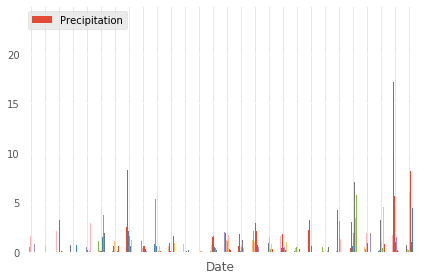

In [93]:
# Use Pandas Plotting with Matplotlib to plot the data
# group data by date
totalPrecipitation = precipitation.iloc[:,[2]].groupby(level='date').sum()
totalPrecipitation.reset_index(drop=True,inplace=True)

ax1 = totalPrecipitation.plot.bar(y= 'prcp', label='Precipitation')
ax1.set_xticklabels([ '' for x in ax1.get_xticklabels()])
ax1.xaxis.set_label_text('Date')
ax1.xaxis
plt.tight_layout()

plt.show()



In [94]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.prcp.describe()

count    2688.000000
mean        0.138549
std         0.411545
min         0.000000
25%         0.000000
50%         0.010000
75%         0.090000
max         5.040000
Name: prcp, dtype: float64

In [95]:
# Design a query to show how many stations are available in this dataset?
precipitation.station.nunique()


9

In [96]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = pd.DataFrame(session.query(*selMeasurement).\
    order_by(Measurement.date.desc()).all())

stations.set_index('date', inplace=True, )
stationCount = stations.groupby(by='station').count().iloc[:,[0]].sort_values('id',ascending=False)
stationCount

,id
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [97]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stationMin = stations[stations.station == 'USC00519281'].iloc[:,[3]].min()
stationMax = stations[stations.station == 'USC00519281'].iloc[:,[3]].max()
stationMean = stations[stations.station == 'USC00519281'].iloc[:,[3]].mean()
print(f'Min:{stationMin}, Max:{stationMax}, Mean:{stationMean}')


Min:tobs    54.0
dtype: float64, Max:tobs    85.0
dtype: float64, Mean:tobs    71.663781
dtype: float64


In [98]:
StationDate = session.query(Measurement.date,func.min(Measurement.id)).filter(Measurement.station == 'USC00519281').all()
StationDate

[('2010-01-01', 12188)]

In [99]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


selMeasurement = [Measurement.id, Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs]

StationTemp = pd.DataFrame(session.query(*selMeasurement).filter(Measurement.date >= '2016-08-18')\
    .filter(Measurement.date <= '2017-08-18')\
    .filter(Measurement.station == 'USC00519281')\
    .order_by(Measurement.date.desc()).all())

StationTemp.set_index('date', inplace=True)
StationTemp = StationTemp.loc[:,['tobs']]


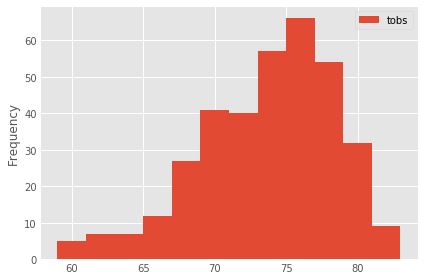

In [100]:
ax1 = StationTemp.plot.hist(y= 'tobs', label='tobs', bins=12)
plt.tight_layout()
plt.show()

In [101]:
# Function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [102]:
print(calc_temps('2017-08-01','2017-08-18'))

[(70.0, 78.63013698630137, 84.0)]


In [103]:
TripAvgTemp = calc_temps('2017-08-01','2017-08-18')[0]

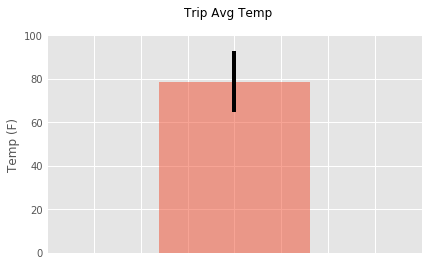

In [104]:
means = TripAvgTemp[1]
standard_errors = TripAvgTemp[2]-TripAvgTemp[0]

fig, ax = plt.subplots()
x_axis = np.arange(0,1)
ax.errorbar(x_axis, means, standard_errors, color='black')
ax.bar(x=0, height = means, color = '#F04B2D', alpha = 0.5)
ax.set_xlim(-1,1)
ax.set_ylim(0,100)
fig.suptitle('Trip Avg Temp')
ax.set_ylabel("Temp (F)")
ax.set_xticklabels('')

plt.show()

In [105]:
# join 2 tables
MS =Measurement
ST =Station

sel = [MS.station,ST.name, ST.latitude, ST.longitude, ST.elevation]
same_station = session.query(*sel,func.sum(MS.prcp))\
    .filter(MS.station == ST.station).group_by(MS.station)\
    .filter(MS.date <= '2017-08-18').filter(MS.date >= '2017-08-01').all()

same_station

[('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.33),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.25),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.5700000000000001),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.06),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.26)]

In [106]:
#Bonus